# Programming Exercise1: Linear Regression

## Linear Regression

In this part of this exercise, you will implement linear regression with one variable to predict the housing prices. Suppose you are living in Boston and want to change house. You are considering different flats and you would like to use freely available datasets to help you in your decision. 

There is an available dataset, the <b>Housing Dataset</b>, which contains information about house in the suburbs of Boston. The dataset can be downloaded from the <i>UCI Machine Learning repository </i> at https://archive.ics.uci.edu/ml/machine-learning-databases/housing/. 

Before you implement our first linear regression model, let's describe briefly the dataset. 
The features of the 506 samples may be summarized as shown in the excerpt of the dataset description: 

<ul>
    <li> <b>CRIM</b>: This is the per capita crime rate by town </li>
    <li> <b>ZN</b>: This is the proportion of residential land zoned for lots larger than  25,000 sq.ft. </li>
    <li> <b>INDUS</b>: This is the proportion of non-retail business acres per town </li>
    <li> <b>CHAS</b>: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise) </li> 
    <li> <b>NOX</b>: This is the nitric oxides concentration (parts per 10 million) </li>
    <li> <b>RM</b>: This is the average number of rooms per dwelling </li>
    <li> <b>AGE</b>: This is the proportion of owner-occupied units built prior to 1940 </li> 
    <li> <b>DIS</b>: This is the weighted distances to five Boston employment centers </li>
    <li> <b>RAD</b>: This is the index of accessibility to radial highways </li>
    <li> <b>TAX</b>: This is the full-value property-tax rate per \$10,000 </li>
    <li> <b>PTRATIO</b>: This is the pupil-teacher ratio by town </li>
    <li> <b>B</b>: This is calculated as $1000(Bk - 0.63)^2$, where $Bk$ is the proportion of people of African American descent by town </li>
    <li> <b>LSTAT</b>: This is the percentage lower status of the population </li> 
    <li> <b>MEDV</b>: This is the median value of owner-occupied homes in \$1000s </li>
</ul>

In the rest of the exercise, you will regard the housing prices (MEDV) as your target variable - the variable that you need to predict using one or more of the 13 explanatory variables.

Before you explore this dataset further, let's fetch it from the UCI repository into a pandas

In [3]:
#Fetch the housing dataset
import numpy as np
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None,sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 
             'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 
             'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Plotting the Data

Before starting on any task, it is often useful to understand the data by visualizing it. In this section you will use some simple yet useful techniques from the graphical EDA toolbox that may help you to visually detect the presence of outliers, the distribution of the data, and the relationships between features. 

First, you will create a scatterplot matrix that allows you to visualize the pair-wise correlations between the different features in this dataset in one place. To plot the scatterplot matrix, you will use the <i>pairplot</i> function from the <i>seaborn</i> library (http://standard.edu/~mwaskom/software/seaborn/), which is a Python library for drawing statistical plot based on <i>matplotlib<i>:

D:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


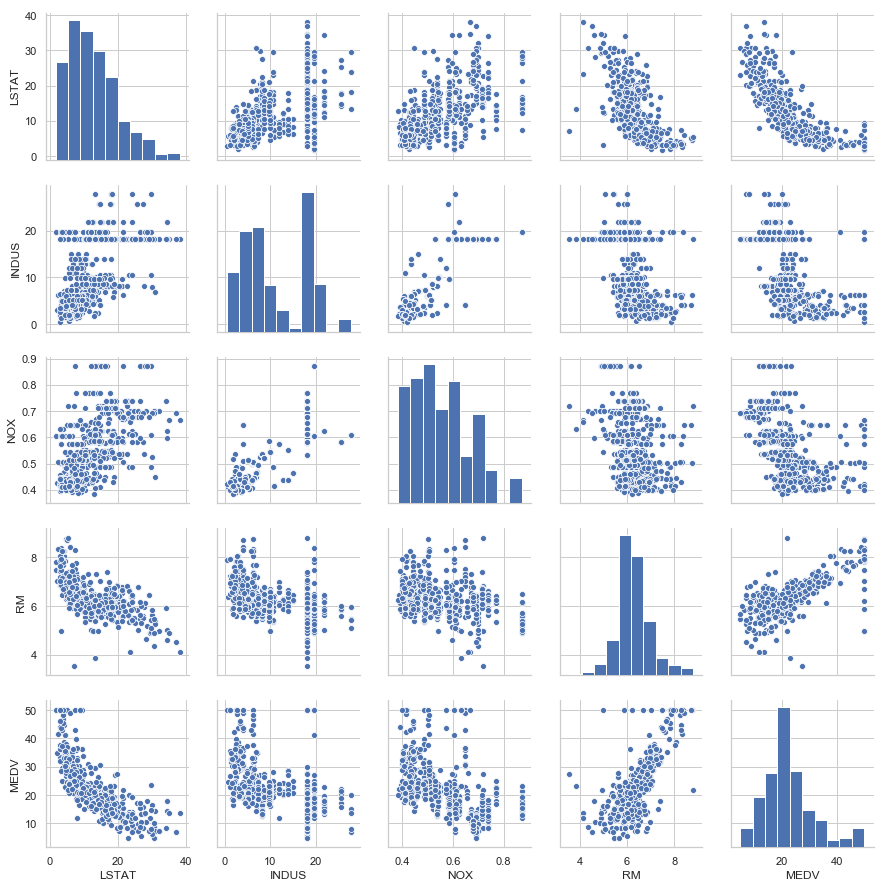

In [5]:
#Plotting the data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], size=2.5)
plt.show()

As you can see in the Figure, the scatterplot matrix provides us with a useful graphical summary of the relationships in a dataset. 

Due to space constraints and for purposes of readability, you only plotted five columns from the dataset. However, you are encouraged to create a scatterplot matrix of the whole <i>DataFrame</i> to further explore the data.

Using this scatterplot matrix, you can now quickly eyeball how the data is distributed and whether it contains outliers. For example, you can see that there is a linear relationship between <b>RM</b> and the housing prices <b>MEDV</b> (the fifth column of the fourth row). Furthermore, you can see in the histogram (the lower right subplot in the scatter plot matrix) that the <b>MEDV</b> variable seems to be normally distributed but contains several outliers.

## Gradient Descent

In this part, you will fit the linear regression parameters $\theta$ to our dataset using gradient descent. 

In [7]:
X = df[['RM']].values
y = df[['MEDV']].values
X.shape

(506, 1)

### Feature Normalization

Gradient descent is one of the many machine learning algorithms that benefits from feature scaling. Here, you will implement  a feature scaling method called <i>NormalizationTransform</i>,  which gives our data the property of a standard normal distribution. The mean of each feature (in this case we have just one) is centered at value 0 and the feature column has a standard deviation of 1. For example, to standardize the $j^{th}$ feature you simply need to subtract the sample mean $\mu_j$ for every training sample and divide it by its standard deviation $\sigma_j$:
\begin{equation}
 x'_j = \frac{x_j-\mu_j}{\sigma_j}
\tag{1}
\end{equation}

Now, please complete the class <i>NormalizationTransform</i> (Optional - Please complete this function only after you have completed all the other parts). 

In [8]:
class NormalizationTransform(object):

    def fit_normalization(self,X):
        """Fit to data, then transform it."""
        #YOUR CODE HERE
        self.X_mean_ = X.mean()
        self.X_sigma_ = X.std()
        X_std = (X-self.X_mean_)/self.X_sigma_
        return X_std

    def normalization(self, X):
        # YOUR CODE HERE
        """Perform standardization by centering and scaling.
           The center and the scale have already been computed by fit_normalization.
           So just use them"""
        return (X-self.X_mean_)/self.X_sigma_

    def inverse_normalization(self,X_std):
        # YOUR CODE HERE
        """Scale back the data to the original representation"""
        return (X_std*self.X_sigma_ + self.X_mean_)

nt_x = NormalizationTransform()
nt_y = NormalizationTransform()

X_std_manual = nt_x.fit_normalization(X)
y_std_manual = nt_y.fit_normalization(y)
# remove single-dimensional entries from the shape of an array.
# y shoud be a vector no a matrix
y_std_manual = np.squeeze(y_std_manual)

# Test: 
# we start with 5.0 value; we normalize it, 
# then we map the normalized value to the original space 
value = 5.0
value_std = nt_x.normalization(value)
print(value_std)
value = nt_x.inverse_normalization(value_std)
print(value)

-1.8301655255632139
5.0


In the previous task, we implemented the normalization class. However, in a real application, we may be interested in more efficient implementation. With sklearn library you can use the following code:

In [9]:
# Standardization Feature Normalization
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()

# Map X and y values into X_std and y_std
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)
# remove single-dimensional entries from the shape of an array.
# y shoud be a vector no a matrix
y_std = np.squeeze(y_std)

# Map a value (for example 5.0) into the std space 
value = np.array([5.0])
value = value.reshape(-1,1)
value_std = sc_x.transform(value)
print(value_std)

## Map value_std in the original space
value=sc_x.inverse_transform(value_std)
print(value)

[[-1.83016553]]
[[5.]]


### Update Equations

The objective of linear regression is to minimize the <i>cost function</i> 

\begin{equation}
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m}(h_\theta (x^{(i)})-y^{(i)})^2 \tag{2}
\end{equation}

where the <i>hypothesis</i> $h_\theta(x)$ is given by the linear model

\begin{equation}
h_\theta (x) = \theta^T x = \theta_0 + \theta_1 x_1 \tag{3}
\end{equation}

Recall that the parameters of your model are the $\theta_j$ values. These are the values you will adjust to minimize the cost $J(\theta)$. One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each iteration perform the update

\begin{equation}
\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta (x^{(i)})-y^{(i)})x^i_j \tag{4}
\end{equation}
where $\theta_j$ is simultaneously updated for all $j$. 
With each step of gradient descent, your parameters $\theta_j$ come closer to the optima values that will achieve the lowest cost $J(\theta)$. 


### Computing the Cost $J(\theta)$

As you perform gradient descent to learn minimize the cost function $J(\theta)$, it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate $J(\theta)$ so you can check the convergence of your gradient descent implementation. 

Your next task is to complete the code in the <i>cost\_function</i> and <i>compute\_hypothesis</i> functions. 

Once you have completed these functions, the next step is to run the code. You will see the cost printed to the screen. 

You should expect to see a cost of 0.805 

#### Implementation Notes:
<ul>
    <li> For the <i>compute\_hypothesis </i> we suggest using the dot product (in Numpy library - np.dot) between X and $\theta_1$  (self.theta\_[1:]); </li>
    <li> $a**b$ in python corresponds to $a^b$; </li> 
    <li> X.shape[i] returns the dimensionality for the $i^{th}$ dimension. </li>
</ul>

In [15]:
import numpy as np
class LinearREgressionGD(object):
    """
    Parameters
    ----------
    alpha : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset

    Attributes
    ----------
    theta_ : 1d-array
        Weights after fitting
    errors_ : list
        Number of misclassifcations in every epoch
    """

    def __init__(self, alpha=0.1, n_iter=100):
        self.alpha = alpha
        self.n_iter = n_iter

    def set_theta(self,theta):
        self.theta_ = theta

    def cost_function(self,X,y):
        """ Compute the Cost function - Eq. 2"""
        # YOUR CODE HERE
        output = self.compute_hypothesis(X)
        errors = output - y
        return (errors**2).sum()/(2.0 * X.shape[0])

    def compute_hypothesis(self, X):
        """ Computer the hypothesis - Eq. 3.
         Use self.theta_[1:] and self.theta_[0] to recall theta_1 and theta_0"""
        return np.dot(X, self.theta_[1:]) + self.theta_[0]

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors,
            where n_sample is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values

        Returns
        -------
        self :  object"""

        self.theta_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            m = X.shape[0]
            output = self.compute_hypothesis(X)
            errors = (output-y)
            # YOUR CODE HERE (see also slides)
            # To recall the vector x^1 use X[:,0]
            #
            #
            self.theta_[1:] -= self.alpha*sum((errors*X[:,0]))/m
            self.theta_[0] -= self.alpha*sum((errors))/m
            cost = self.cost_function(X,y)
            self.cost_.append(cost)
        return self

    def predict(self, X):
        """ Return the prediction """
        return self.compute_hypothesis(X)

In [14]:
# Linear regression
# Test Cost function
lr = LinearREgressionGD()
lr.set_theta(np.array([1,1]))
cost=lr.cost_function(X_std,y_std)
print("Cost function: %.3f" % cost)
# Test our normalization function
cost=lr.cost_function(X_std_manual,y_std_manual)
print("Cost function: %.3f" % cost)

Cost function: 0.805
Cost function: 0.805


### Gadient Descent

Next, you will implement gradient descent (<i>fit\_function</i>). As you program, make sure you understand what you are try to optimize and what is being updated. Keep in mind that the cost $J(\theta)$ is parameterized by the vector $\theta$, not $X$ and $y$. That is, we minimize the value of $J(\theta)$ by changing the values of the vector $\theta$, not by changing $X$ and $y$. 

#### Implementation Notes:
<ul>
    <li> Computing the $h_\theta (x^{(i)})$ for all $i$ using the function <i>compute\_hypothesis</i>; </li>
    <li> Computing the error vector $e$, where $e_i =(h_\theta (x^{(i)})-y^{(i)})$; </li> 
    <li> Updating self.theta\_[1:] and self.theta\_[0] following Updating Equation (see also slides) </li>
</ul>

In [17]:
# Gradient Descent
lr.fit(X_std,y_std)

### Visualizing $J(\theta)$
It is always a good idea to plot the cost as a function of the number of epochs (passes over the training dataset) when we are using an optimization algorithm, such as gradient descent, to check for convergence.
Let's plot the cost against the number of epochs to check if the linear regression has converged.

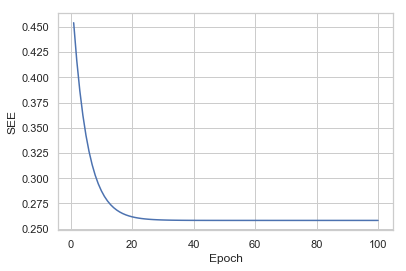

In [18]:
# plot cost against the n. epochs
plt.plot(range(1,lr.n_iter+1), lr.cost_)
plt.ylabel('SEE')
plt.xlabel('Epoch')
plt.show()

As you can see in the Figure, the GD algorithm converged after few epochs

Next, let's visualize how well the linear regression line fits the training data. To do so, you will define a simple helper function that will plot a scatterplot of the training sample and add the regression line. Then you will use this function to plot the number of rooms against house prices: 

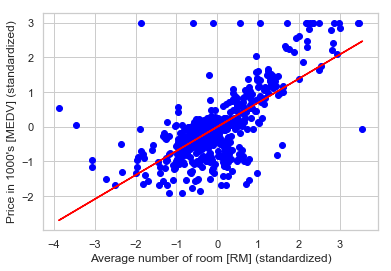

In [19]:
#Linear regression line
def lin_regplot(X, y, model):
    plt.scatter(X,y, c='blue')
    plt.plot(X, model.predict(X), c='red')
    return None

lin_regplot(X_std,y_std, lr)
plt.xlabel('Average number of room [RM] (standardized)')
plt.ylabel('Price in 1000\'s [MEDV] (standardized)')
plt.show()

As you can see in this Figure, the linear regression line reflects the general trend that house prices tend to increase with the number of rooms.

Interestingly, we observe a curious line $y=3$, which suggests that the prices may have been clipped. 

In certain applications, it may also be important to report the predicted outcome variables on their original scale. To scale the predicted price outcome back on the Price in \$1000's axes. 
We will use the previously trained linear regression model to predict the price of a house with five rooms.
According to our model, you should expect to see a predicted house price of \$10840.

In [20]:
#Predict price
#YOUR CODE HERE
#num_rooms_std = #complete the code
#price_std = lr.predict(num_rooms_std)
#print("Price in $1000's: %.3f " % #complete the code - you need to convert the predicted value)
print("Slop: %.3f" % lr.theta_[1])
print('Intercept: %.3f' % lr.theta_[0])

Slop: 0.695
Intercept: -0.000


## Linear Regression via scikit-learn
In the previous section, you implemented a working model for regression analysis. However, in a real-world application, we may be interested in a more efficient implementation, for example, scikit-learn's \textit{LinearRegression} object that makes use of the \textbf{LIBLINEAR} library and advanced optimization algorithms that work better with unstandardized variables. This is sometimes desirable for certain applications: 


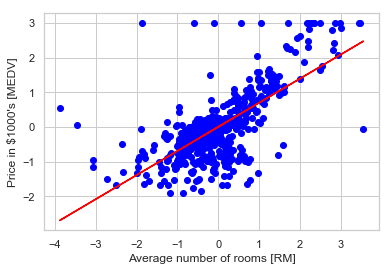

Slope: 0.695
Intercept: -0.000


In [21]:
#Linear regression via scikit-learn
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X_std,y_std)
lin_regplot(X_std,y_std,slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.show()
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Now, if you plot the training data and the fitted model by executing the code above, you can see that the overall result look identical to your Gradient Descent implementation. 